<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/Gayan_DL201_car_type_recogition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

# import libraries
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
import random
from google.colab import drive

     |████████████████████████████████| 727kB 7.8MB/s 
     |████████████████████████████████| 1.2MB 16.2MB/s 
     |████████████████████████████████| 204kB 36.5MB/s 
     |████████████████████████████████| 51kB 964kB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
Mounted at /content/gdrive


In [2]:
drive.mount("/content/gdrive", force_remount=True)
root_dir = '/content/gdrive/MyDrive/DataSets'
path = Path(root_dir + '/CT2')
path

Mounted at /content/gdrive


Path('/content/gdrive/MyDrive/DataSets/CT2')

In [3]:
path.ls()

(#4) [Path('/content/gdrive/MyDrive/DataSets/CT2/sedan'),Path('/content/gdrive/MyDrive/DataSets/CT2/pickup'),Path('/content/gdrive/MyDrive/DataSets/CT2/convertable'),Path('/content/gdrive/MyDrive/DataSets/CT2/station_wagon')]

In [4]:
fns = get_image_files(path)
len(fns)

1138

/content/gdrive/MyDrive/DataSets/CT2/sedan/00000090.jpg


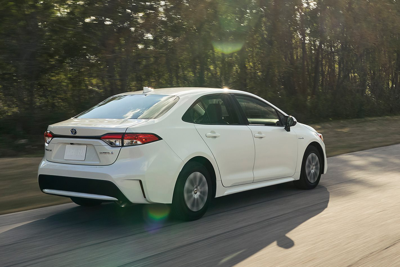

In [6]:
img_file = random.choice(list(fns))
print(img_file)
im = Image.open(img_file)
im.to_thumb(300,400)

In [7]:
cars = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=10),
        get_y=parent_label)

In [8]:
cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish))
# cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)

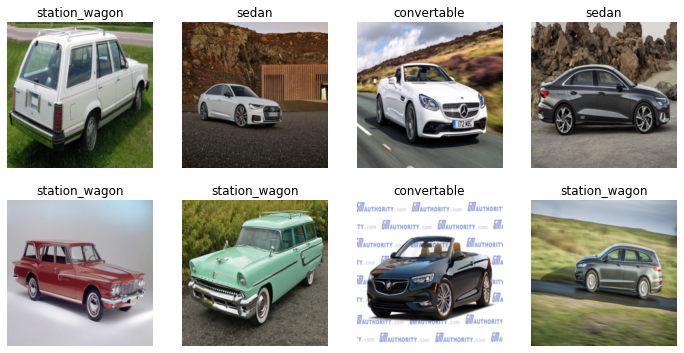

In [9]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Minimum: 6.92e-03, steepest point: 2.29e-04


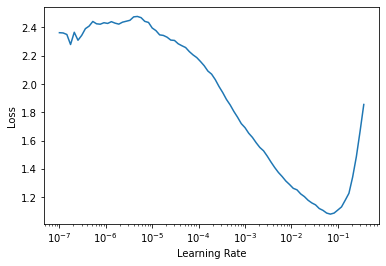

In [10]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])
lr_min, lr_steep = learn.lr_find()
print(f"Minimum: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [11]:
lr = 6.92e-03
learn.fine_tune(base_lr=lr, epochs=5, freeze_epochs=1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.077996,1.005329,0.162996,0.837004,01:14


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.329954,0.696551,0.123348,0.876652,00:38
1,0.294390,0.760249,0.118943,0.881057,00:39
2,0.239471,0.914550,0.132159,0.867841,00:39
3,0.177728,0.355368,0.061674,0.938326,00:40
4,0.125239,0.317377,0.061674,0.938326,00:38


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

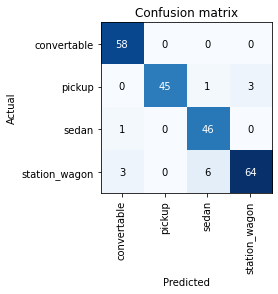

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
# learn.export('/content/gdrive/MyDrive/Colab Notebooks/models/car_types_model_acc_0.938326.pkl')

In [22]:
cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)

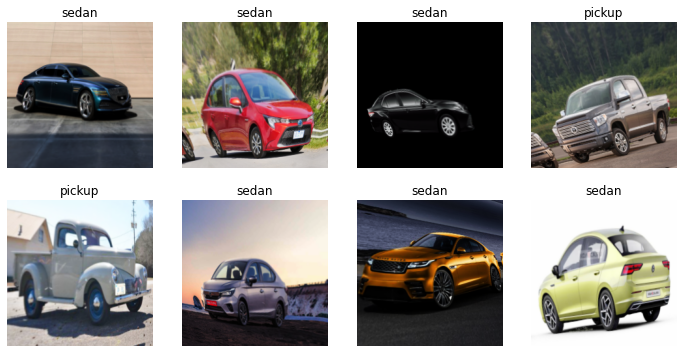

In [24]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Minimum: 6.92e-03, steepest point: 2.75e-04


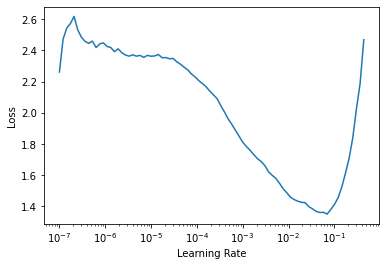

In [25]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])
lr_min, lr_steep = learn.lr_find()
print(f"Minimum: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [26]:
learn.fit_one_cycle(5, 6.92e-03)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.217778,1.260432,0.202643,0.797357,00:39
1,0.880644,0.860587,0.180617,0.819383,00:38
2,0.675104,0.427545,0.101322,0.898678,00:38
3,0.532101,0.272361,0.088106,0.911894,00:38
4,0.410652,0.231511,0.079295,0.920705,00:38


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Minimum: 1.91e-05, steepest point: 7.59e-07


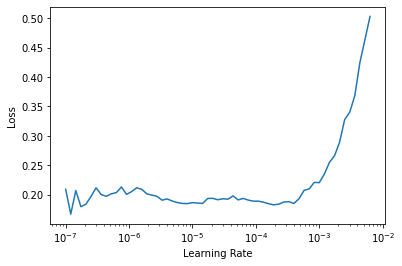

In [27]:
learn.unfreeze()

lr_min, lr_steep = learn.lr_find()
print(f"Minimum: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [28]:
learn.fit_one_cycle(10, 1.00e-04)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.189378,0.250625,0.083700,0.916300,00:38
1,0.184817,0.239220,0.070485,0.929515,00:38
2,0.178063,0.520557,0.101322,0.898678,00:39
3,0.166136,0.411158,0.105727,0.894273,00:39
4,0.161542,0.316448,0.074890,0.925110,00:39
5,0.151224,0.399470,0.083700,0.916300,00:39
6,0.128669,0.312117,0.083700,0.916300,00:39
7,0.109297,0.282235,0.083700,0.916300,00:39
8,0.096188,0.254832,0.070485,0.929515,00:38
9,0.085609,0.247700,0.061674,0.938326,00:39


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

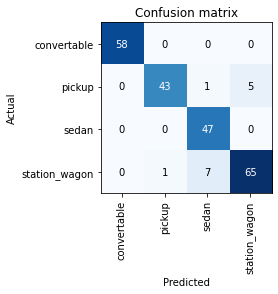

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [31]:
# learn.export('/content/gdrive/MyDrive/Colab Notebooks/models/car_types_model_acc_0.938.pkl')

In [66]:
cars = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=10),
                   item_tfms=Resize(300, ResizeMethod.Squish),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = cars.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


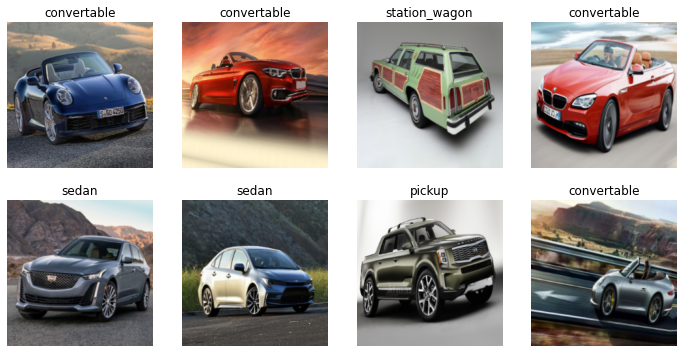

In [67]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)

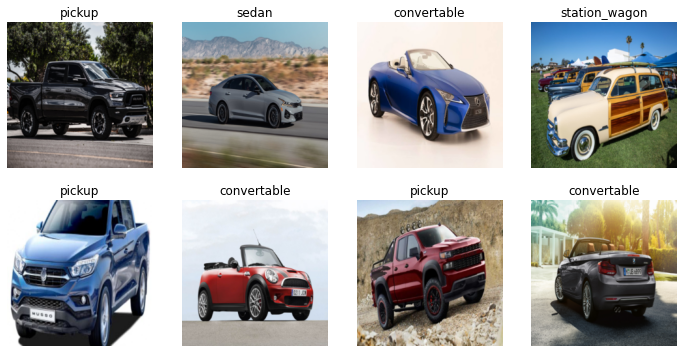

In [68]:
dls.valid.show_batch(max_n=8, nrows=2, unique=False)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Minimum: 5.75e-03, steepest point: 5.75e-04


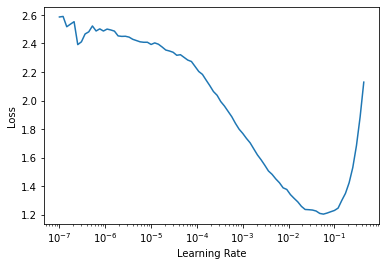

In [69]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])
lr_min, lr_steep = learn.lr_find()
print(f"Minimum: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [71]:
learn.fit_one_cycle(5,5.75e-03)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.087148,0.301495,0.083700,0.916300,00:39
1,0.091340,0.615496,0.132159,0.867841,00:40
2,0.107837,0.418048,0.096916,0.903084,00:40
3,0.110397,0.226088,0.057269,0.942731,00:39
4,0.092301,0.254521,0.070485,0.929515,00:40


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

Minimum: 1.32e-05, steepest point: 9.12e-07


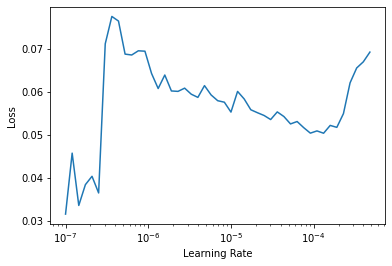

In [72]:
learn.unfreeze()

lr_min, lr_steep = learn.lr_find()
print(f"Minimum: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [73]:
print(lr_min)

1.3182566908653825e-05


In [74]:
learn.fit_one_cycle(10, lr_min)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.067821,0.259876,0.074890,0.925110,00:40
1,0.056128,0.266971,0.066079,0.933921,00:41
2,0.044864,0.277734,0.057269,0.942731,00:40
3,0.036548,0.290515,0.070485,0.929515,00:40
4,0.036196,0.303879,0.066079,0.933921,00:40
5,0.030312,0.267293,0.061674,0.938326,00:40
6,0.026161,0.258788,0.052863,0.947137,00:40
7,0.029814,0.238213,0.048458,0.951542,00:40
8,0.025444,0.248784,0.048458,0.951542,00:40
9,0.025592,0.246687,0.048458,0.951542,00:40


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [75]:
# learn.export('/content/gdrive/MyDrive/Colab Notebooks/models/car_types_model_acc_0.9515.pkl')